***UN PROBLEMA, DOS SOLUCIONES***

***Problema: Creación de muchos tipos específicos de algo en partícular y su interacción entre ellos.***

***La idea es separar las partes del proceso***

***Si con strategy definiamos tipos de algo específico, acá estamos definiendo la creación de los distintos componentes que integran el sistema. Strategy apunta a algo más específico***

***EJEMPLOS:*** 

***Animales:*** 

***1)Abstract Method: Creación de distintos animales.***

***2)Strategy: Creación de disntintas razas de perros, tipos de tigres, razas de caballos***


***Vehículos*** 

***1)Abstract Method: Creación de distintos vehículos: Helicóptero, Auto, Camiones, Motos.***

***2)Strategy: Creación de diversas marcas de autos, marcas de helicópteros, tipos de camiones, etc***


***MISMO PROBLEMA QUE FACTORY_METHOD***

***Abstract_factory usa agregación en lugar de herencia***

Es la misma idea del patrón Estrategy pero aplicado al problea de crear objetos

Primero instanciamos las clases que existirán, animales, plantas, etc.

In [18]:
class Tiger
    def initialize(name) 
      @name = name 
    end
    def eat 
      puts("Duck #{@name} is eating.") 
    end
    def speak 
      puts("Duck #{@name} says Quack!") 
    end
    def sleep 
      puts("Duck #{@name} sleeps quietly.")
    end 
  end
  
class Tree
  def initialize(name) 
    @name = name 
  end
end

class Frog
    def initialize(name) 
      @name = name 
    end
    def eat 
      puts("Frog #{@name} is eating.") 
    end
    def speak 
      puts("Frog #{@name} says Crooooaaaak!") 
    end
    def sleep 
      puts("Frog #{@name} doesnt sleep, he coreaks all night!")
    end 
  end

  
class Algae
  def initialize(name) 
    @name = name 
  end
end


:initialize

Luego instanciamos el habitat, que es la clase a la que le pasarán atributos de clases.

In [19]:
class Habitat
  def initialize(number_animals, number_plants, organism_factory)
    @organism_factory = organism_factory
    @animals = []
    number_animals.times do |i|
      animal = @organism_factory.new_animal("Animal#{i}")
      @animals << animal
    end
    @plants = []
    number_plants.times do |i|
      plant = @organism_factory.new_plant("Plant#{i}")
      @plants << plant
    end
  end
  def simulate_one_day    
    @animals.each {|animal| animal.speak}    
    @animals.each {|animal| animal.eat}    
    @animals.each {|animal| animal.sleep}  
  end 
end

:simulate_one_day

Instanciamos las distintas fábricas que crean distintos tipos de animales, estas clases serán pasadas como atributo a la clase madre principal

In [20]:
class PondOrganismFactory
  def new_animal(name)
    Frog.new(name)
  end
  def new_plant(name)
    Algae.new(name)
  end
end

:new_plant

In [21]:
class JungleOrganismFactory
  def new_animal(name)
    Tiger.new(name)
  end
  def new_plant(name)
    Tree.new(name)
  end
end

:new_plant

In [23]:
jungle2 =  JungleOrganismFactory.new
jungle = Habitat.new(1, 4, JungleOrganismFactory.new)
jungle.simulate_one_day
pond = Habitat.new( 2, 4, PondOrganismFactory.new)
pond.simulate_one_day

Duck Animal0 says Quack!
Duck Animal0 is eating.
Duck Animal0 sleeps quietly.
Frog Animal0 says Crooooaaaak!
Frog Animal1 says Crooooaaaak!
Frog Animal0 is eating.
Frog Animal1 is eating.
Frog Animal0 doesnt sleep, he coreaks all night!
Frog Animal1 doesnt sleep, he coreaks all night!


[#<Frog:0x00007ff2019a97f0 @name="Animal0">, #<Frog:0x00007ff2019a9638 @name="Animal1">]

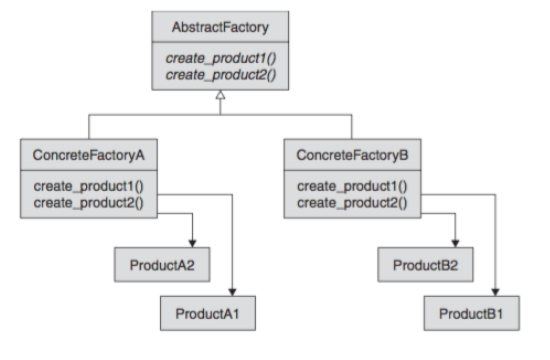

***Gracias a esto podemos tener la parte de interacción y de crear separadas. De esta manera podemos hacer algoritmos de creación e interacción "enchufables" entre sí***